In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

excel_file = (r'C:\Users\Kusum Joshi\Downloads\sales_data.xlsx')

df= pd.read_excel(excel_file)
df.head()

,Unnamed: 0,Customer ID,Customer Age,Customer Gender,Product Category,Cost,Sales Price,Quantity,Date of Purchase,Region,Sales Channel
0,0,1,38,Male,Sports & Outdoors,389.62,541.5718,3,2022-07-25,East,Online
1,1,2,66,Other,Sports & Outdoors,133.87,159.3053,4,2023-11-15,West,Online
2,2,3,60,Male,Electronics,188.87,236.0875,2,2022-08-15,North,Online
3,3,4,58,Other,Sports & Outdoors,99.05,129.7555,3,2023-08-01,West,In-store
4,4,5,63,Male,Beauty & Health,488.85,664.8360,3,2022-06-14,South,Online


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        100 non-null    int64         
 1   Customer ID       100 non-null    int64         
 2   Customer Age      100 non-null    int64         
 3   Customer Gender   100 non-null    object        
 4   Product Category  100 non-null    object        
 5   Cost              100 non-null    float64       
 6   Sales Price       100 non-null    float64       
 7   Quantity          100 non-null    int64         
 8   Date of Purchase  100 non-null    datetime64[ns]
 9   Region            100 non-null    object        
 10  Sales Channel     100 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 8.7+ KB


In [7]:
df.describe()

,Unnamed: 0,Customer ID,Customer Age,Cost,Sales Price,Quantity,Date of Purchase
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100
mean,49.500000,50.500000,43.200000,250.463800,325.018861,2.47000,2023-01-05 02:24:00
min,0.000000,1.000000,18.000000,10.610000,13.686900,1.00000,2022-02-14 00:00:00
25%,24.750000,25.750000,29.000000,104.592500,139.869900,1.00000,2022-07-30 18:00:00
50%,49.500000,50.500000,42.500000,244.220000,296.315750,3.00000,2022-12-08 00:00:00
75%,74.250000,75.250000,58.000000,390.497500,491.692875,3.00000,2023-06-16 06:00:00
max,99.000000,100.000000,69.000000,491.970000,710.932400,4.00000,2024-02-05 00:00:00
std,29.011492,29.011492,15.562841,153.538106,202.007295,1.10513,NaN


In [8]:
df.isnull().sum()

Unnamed: 0          0
Customer ID         0
Customer Age        0
Customer Gender     0
Product Category    0
Cost                0
Sales Price         0
Quantity            0
Date of Purchase    0
Region              0
Sales Channel       0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

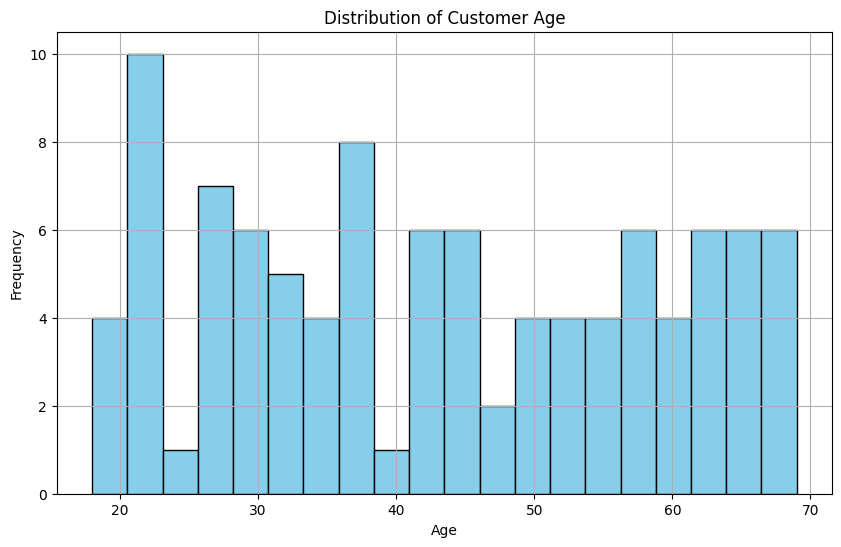

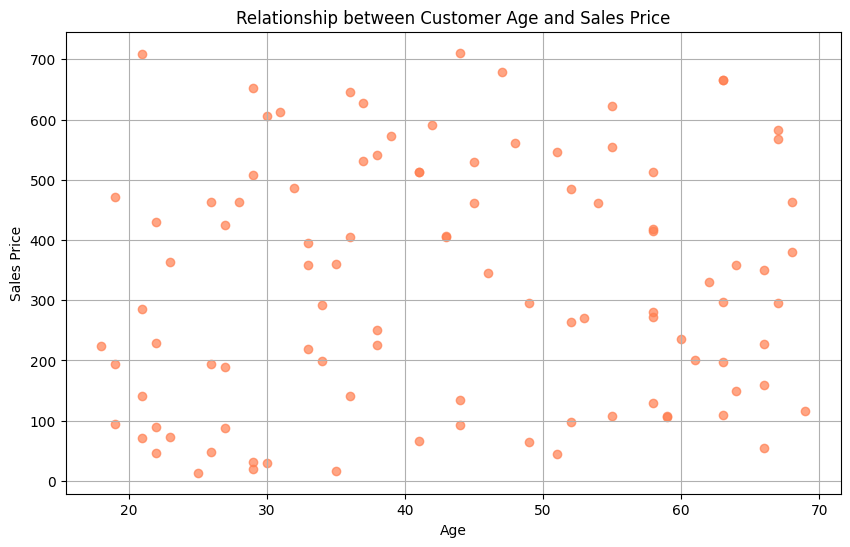

In [10]:
# Visualizing the distribution of customer age
plt.figure(figsize=(10, 6))
plt.hist(df['Customer Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Exploring the relationship between customer age and sales price
plt.figure(figsize=(10, 6))
plt.scatter(df['Customer Age'], df['Sales Price'], color='coral', alpha=0.7)
plt.title('Relationship between Customer Age and Sales Price')
plt.xlabel('Age')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

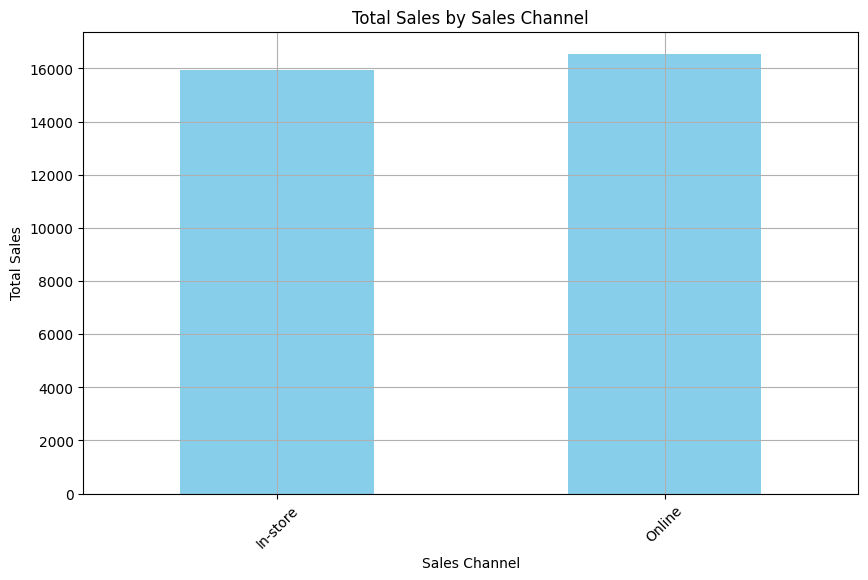

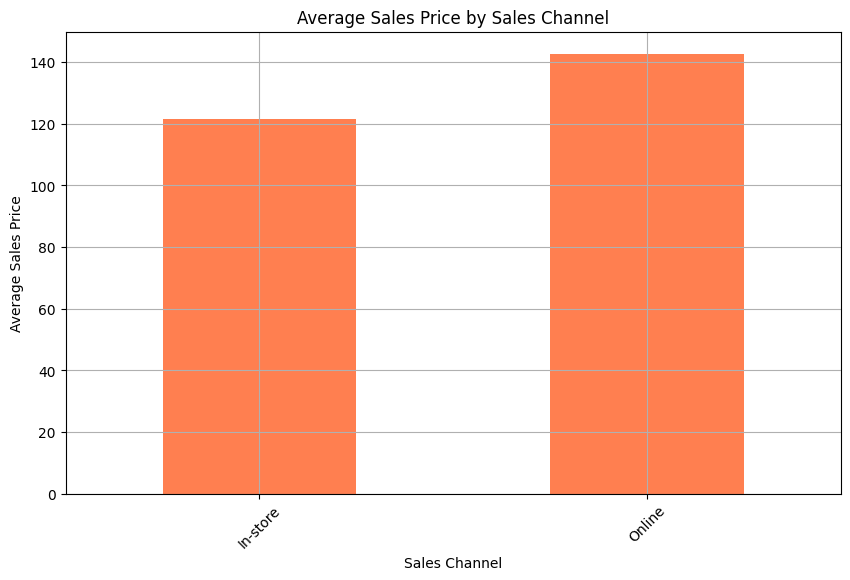

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by sales channel and calculating total sales and average sales price
sales_performance = df.groupby('Sales Channel').agg({'Sales Price': 'sum', 'Quantity': 'sum'})
sales_performance['Average Sales Price'] = sales_performance['Sales Price'] / sales_performance['Quantity']

# Plotting total sales by sales channel
plt.figure(figsize=(10, 6))
sales_performance['Sales Price'].plot(kind='bar', color='skyblue')
plt.title('Total Sales by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting average sales price by sales channel
plt.figure(figsize=(10, 6))
sales_performance['Average Sales Price'].plot(kind='bar', color='coral')
plt.title('Average Sales Price by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Sales Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


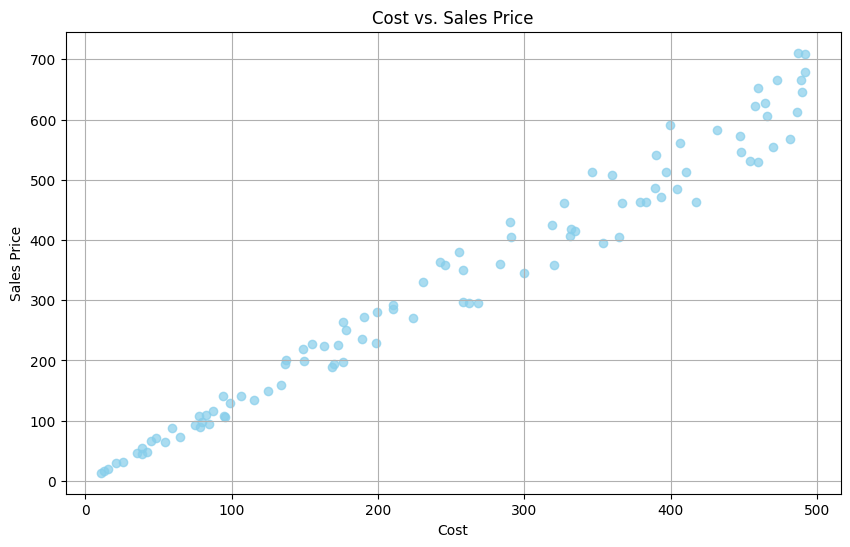

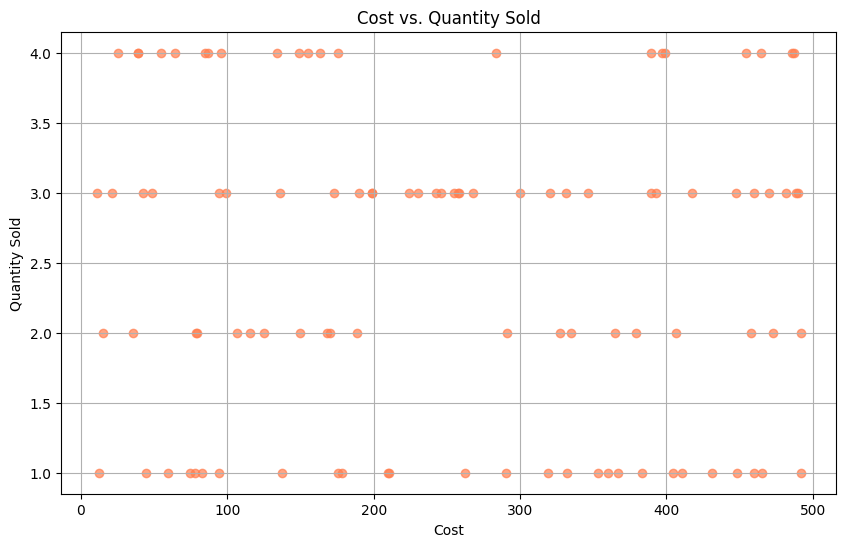

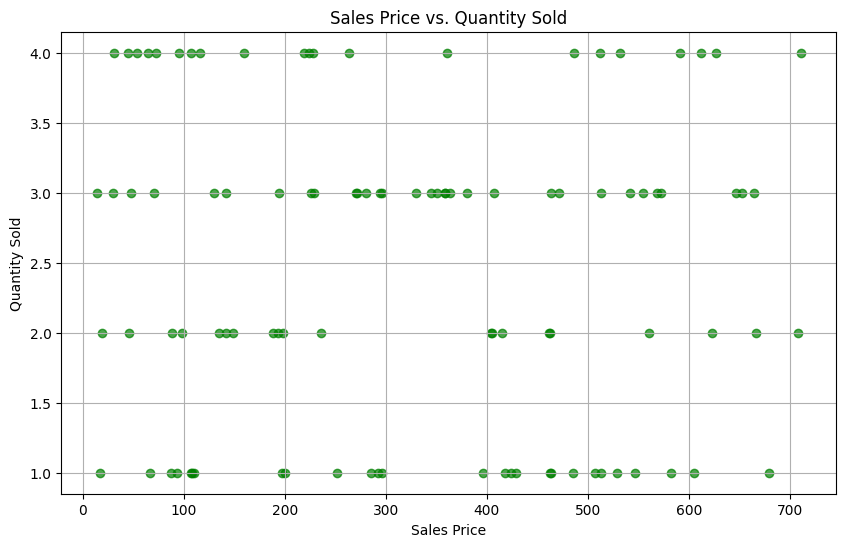

In [12]:
# Scatter plot: Cost vs. Sales Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Cost'], df['Sales Price'], color='skyblue', alpha=0.7)
plt.title('Cost vs. Sales Price')
plt.xlabel('Cost')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()

# Scatter plot: Cost vs. Quantity Sold
plt.figure(figsize=(10, 6))
plt.scatter(df['Cost'], df['Quantity'], color='coral', alpha=0.7)
plt.title('Cost vs. Quantity Sold')
plt.xlabel('Cost')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

# Scatter plot: Sales Price vs. Quantity Sold
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales Price'], df['Quantity'], color='green', alpha=0.7)
plt.title('Sales Price vs. Quantity Sold')
plt.xlabel('Sales Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()


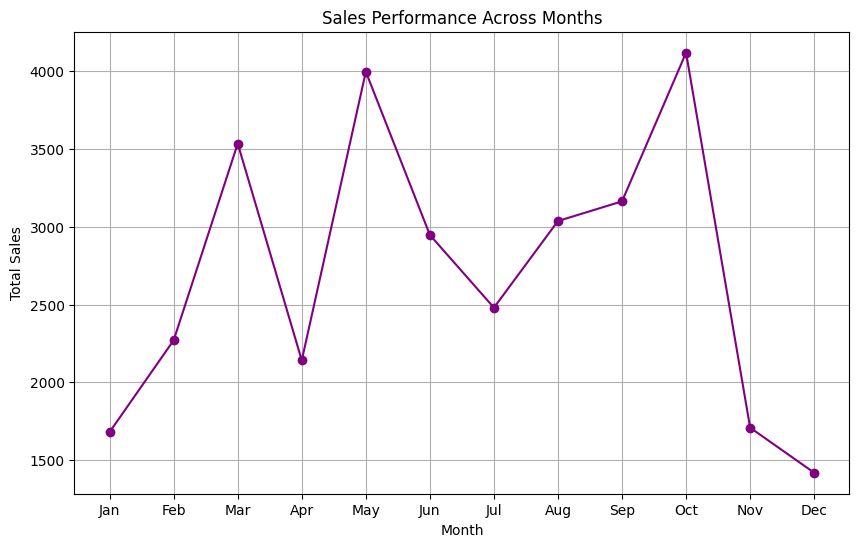

In [13]:
# Convert 'Date of Purchase' column to datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])

# Extract month from the 'Date of Purchase' column
df['Month'] = df['Date of Purchase'].dt.month

# Group data by month and calculate total sales
monthly_sales = df.groupby('Month')['Sales Price'].sum()

# Plotting sales performance across months
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Sales Performance Across Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


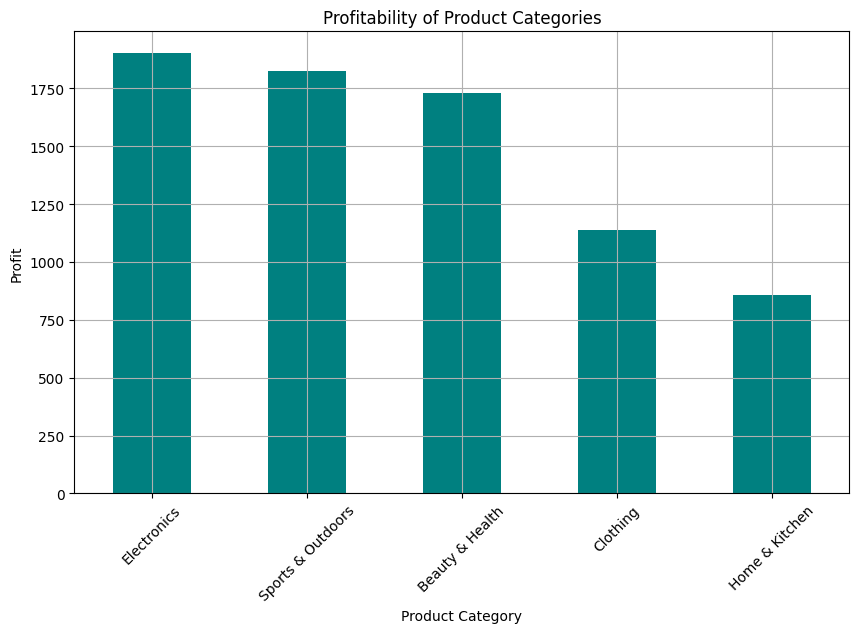

The most profitable product category is: Electronics


In [14]:
# Calculate total sales revenue and total cost for each product category
category_profitability = df.groupby('Product Category').agg({'Sales Price': 'sum', 'Cost': 'sum'})

# Calculate profitability (total sales - total cost) for each category
category_profitability['Profit'] = category_profitability['Sales Price'] - category_profitability['Cost']

# Sort categories by profitability in descending order
category_profitability = category_profitability.sort_values(by='Profit', ascending=False)

# Plotting profitability of each product category
plt.figure(figsize=(10, 6))
category_profitability['Profit'].plot(kind='bar', color='teal')
plt.title('Profitability of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Print the most profitable product category
most_profitable_category = category_profitability.head(1).index[0]
print(f"The most profitable product category is: {most_profitable_category}")
